<a href="https://colab.research.google.com/github/anphantt2406/heatdata_TKNC/blob/main/NH%C3%93M_7_TH%E1%BB%90NG_K%C3%8A_N%C3%82NG_CAO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

• `X1` Relative Compactness - Độ nhỏ gọn <br>
• `X2` Surface Area - Diện tích bề mặt (m2) <br>
• `X3` Wall Area - Diện tích tường (m2) <br>
• `X4` Roof Area - Khu vực mái nhà (m2) <br>
• `X5` Overall Height - Chiều cao tổng thể (m) <br>
• `X6` Orientation - Định hướng (2:North, 3:East, 4:South, 5:West) <br>
• `X7` Glazing Area - Khu vực dán kính (0%, 10%, 25%, 40% of floor area)<br>
• `X8` Glazing Area Distribution - Phân bố khu vực dán kính (1:Uniform, 2:North, 3:East, 4:South, 5:West) <br>
• `y1` Heating Load - Mức độ thu nhiệt (kWh/m²) <br>
• `y2` Cooling Load - Mức độ tỏa nhiệt (kWh/m²) <br>

**Mục đích:** đánh giá các nhân tố ảnh hưởng đến mức độ thu nhiệt (heating load) và tỏa nhiệt (cooling load) của các ngôi nhà.

## Import Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
path = 'https://raw.githubusercontent.com/anphantt2406/heatdata_TKNC/main/heat_data.csv'
df = pd.read_csv(path)
df.head(10)

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
5,0.90,563.5,318.5,122.50,7.0,3,0.0,0,21.46,25.38
6,0.90,563.5,318.5,122.50,7.0,4,0.0,0,20.71,25.16
7,0.90,563.5,318.5,122.50,7.0,5,0.0,0,19.68,29.60
8,0.86,588.0,294.0,147.00,7.0,2,0.0,0,19.50,27.30
9,0.86,588.0,294.0,147.00,7.0,3,0.0,0,19.95,21.97


In [ ]:
df.columns = ['relative_compactness', 'surface_area', 'wall_area', 'roof_area', \
            'overall_height', 'orientation', 'glazing_area', 'glazing_area_distribution', 'heating_load', 'cooling_load']

In [ ]:
# dimension of the data frame
print('Dimension of the dataframe: ',df.shape)
df.info()

Dimension of the dataframe:  (768, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   relative_compactness       768 non-null    float64
 1   surface_area               768 non-null    float64
 2   wall_area                  768 non-null    float64
 3   roof_area                  768 non-null    float64
 4   overall_height             768 non-null    float64
 5   orientation                768 non-null    int64  
 6   glazing_area               768 non-null    float64
 7   glazing_area_distribution  768 non-null    int64  
 8   heating_load               768 non-null    float64
 9   cooling_load               768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


## Data cleaning

In [ ]:
# check missing value
print('Number of missing values: ')
print(df.isnull().sum()) 

Number of missing values: 
relative_compactness         0
surface_area                 0
wall_area                    0
roof_area                    0
overall_height               0
orientation                  0
glazing_area                 0
glazing_area_distribution    0
heating_load                 0
cooling_load                 0
dtype: int64


In [ ]:
df.duplicated().any()

False

In [ ]:
df.nunique()

relative_compactness          12
surface_area                  12
wall_area                      7
roof_area                      4
overall_height                 2
orientation                    4
glazing_area                   4
glazing_area_distribution      6
heating_load                 586
cooling_load                 636
dtype: int64

In [ ]:
features_df = df.iloc[:,0:8]
target_df = df.iloc[:,8:]
y1 = df.iloc[:,8]
y2 = df.iloc[:,9]

In [ ]:
for i in features_df.columns:
    print(i,' : ',features_df[i].unique())

relative_compactness  :  [0.98 0.9  0.86 0.82 0.79 0.76 0.74 0.71 0.69 0.66 0.64 0.62]
surface_area  :  [514.5 563.5 588.  612.5 637.  661.5 686.  710.5 735.  759.5 784.  808.5]
wall_area  :  [294.  318.5 343.  416.5 245.  269.5 367.5]
roof_area  :  [110.25 122.5  147.   220.5 ]
overall_height  :  [7.  3.5]
orientation  :  [2 3 4 5]
glazing_area  :  [0.   0.1  0.25 0.4 ]
glazing_area_distribution  :  [0 1 2 3 4 5]


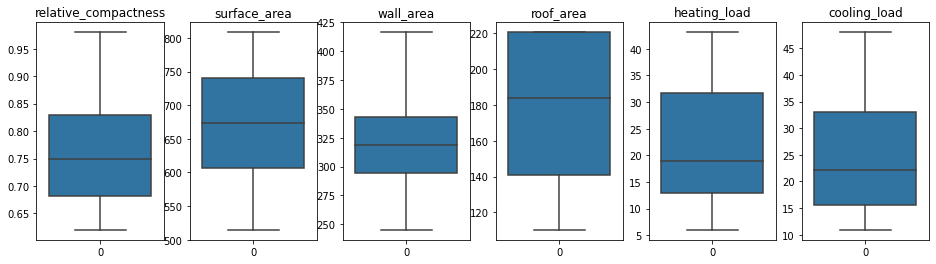

In [ ]:
continousValue = ['relative_compactness', 'surface_area', 'wall_area', 'roof_area', 'heating_load', 'cooling_load']
f, axes = plt.subplots(1, 6, figsize=(16,4))
for i , t in enumerate(continousValue):
  sns.boxplot( data=df[t],  ax=axes[i]).set(title=t)
# images_dir = '/content/drive/MyDrive/MASTER/HK4/Advanced Statistic/finalExamination/images'
# plt.savefig(f"{images_dir}/2.1.png")

**Nhận xét**: 
*   Bộ dữ liệu không chứa các giá trị khuyết (missing values), không có dữ liệu bị duplicate. 
*   Các biến `X1-Relative Compactness`, `X2-Surface Area`, `X3-Wall Area` và `X4-Roof Area` là những biến liên tục, và không chứa giá trị ngoại lai (outlier).
*   Biến mục tiêu `Y1-heating_load` và `Y2-cooling_load` cũng là biến liên tục và không chứa các giá trị outlier.
*   Biến `X5-Overall Height` chỉ có 2 giá trị là 3.5m và 7m nên được xem là biến phân loại. 
Tương tự, các biến `X6-Orientation`, `X7-Glazing Area` và `X8-Glazing Area Distribution` cũng là các biến phân loại.




## Data visualization - Exploratory data analysis (EDA)

In [ ]:
df.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
relative_compactness,768.0,0.764167,0.105777,0.62,0.6825,0.75,0.8300,0.98
surface_area,768.0,671.708333,88.086116,514.50,606.3750,673.75,741.1250,808.50
wall_area,768.0,318.500000,43.626481,245.00,294.0000,318.50,343.0000,416.50
roof_area,768.0,176.604167,45.165950,110.25,140.8750,183.75,220.5000,220.50
overall_height,768.0,5.250000,1.751140,3.50,3.5000,5.25,7.0000,7.00
orientation,768.0,3.500000,1.118763,2.00,2.7500,3.50,4.2500,5.00
glazing_area,768.0,0.234375,0.133221,0.00,0.1000,0.25,0.4000,0.40
glazing_area_distribution,768.0,2.812500,1.550960,0.00,1.7500,3.00,4.0000,5.00
heating_load,768.0,22.307201,10.090196,6.01,12.9925,18.95,31.6675,43.10
cooling_load,768.0,24.587760,9.513306,10.90,15.6200,22.08,33.1325,48.03


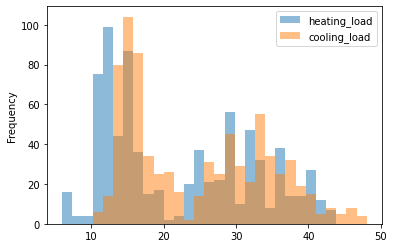

In [ ]:
target_df.plot.hist(bins=30, alpha=0.5)
# images_dir = '/content/drive/MyDrive/MASTER/HK4/Advanced Statistic/finalExamination/images'
# plt.savefig(f"{images_dir}/Hinh_2_targetVariableDistribution.png")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


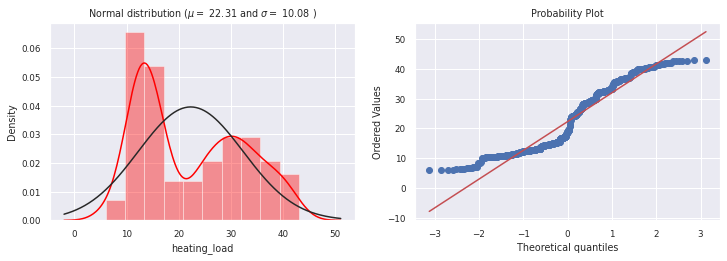

<Figure size 432x288 with 0 Axes>

In [ ]:
# Check normal distribution of heating_load with a histogram and maximum likelihood gaussian
from scipy import stats
from scipy.stats import norm
plt.figure(figsize=(12,8))
sns.set(font_scale=.8)

ax1 = plt.subplot(221)
sns.distplot(df['heating_load'], fit=norm, color='red')
(mu, sigma) = stats.norm.fit(df['heating_load'])
ax1.set(title='Normal distribution ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma))

# PDF
ax2 = plt.subplot(222)
stats.probplot(df['heating_load'], plot=plt)
fig = plt.figure()

# images_dir = '/content/drive/MyDrive/MASTER/HK4/Advanced Statistic/finalExamination/images'
# plt.savefig(f"{images_dir}/241.png")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


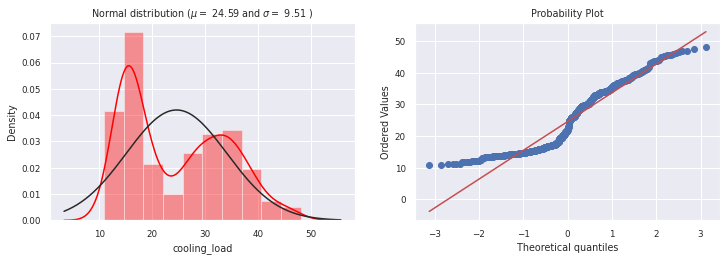

<Figure size 432x288 with 0 Axes>

In [ ]:
# Check normal distribution of heating_load with a histogram and maximum likelihood gaussian
from scipy import stats
from scipy.stats import norm
plt.figure(figsize=(12,8))
sns.set(font_scale=.8)

ax1 = plt.subplot(221)
sns.distplot(df['cooling_load'], fit=norm, color='red')
(mu, sigma) = stats.norm.fit(df['cooling_load'])
ax1.set(title='Normal distribution ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma))

# PDF
ax2 = plt.subplot(222)
stats.probplot(df['cooling_load'], plot=plt)
fig = plt.figure()

# images_dir = '/content/drive/MyDrive/MASTER/HK4/Advanced Statistic/finalExamination/images'
# plt.savefig(f"{images_dir}/242.png")

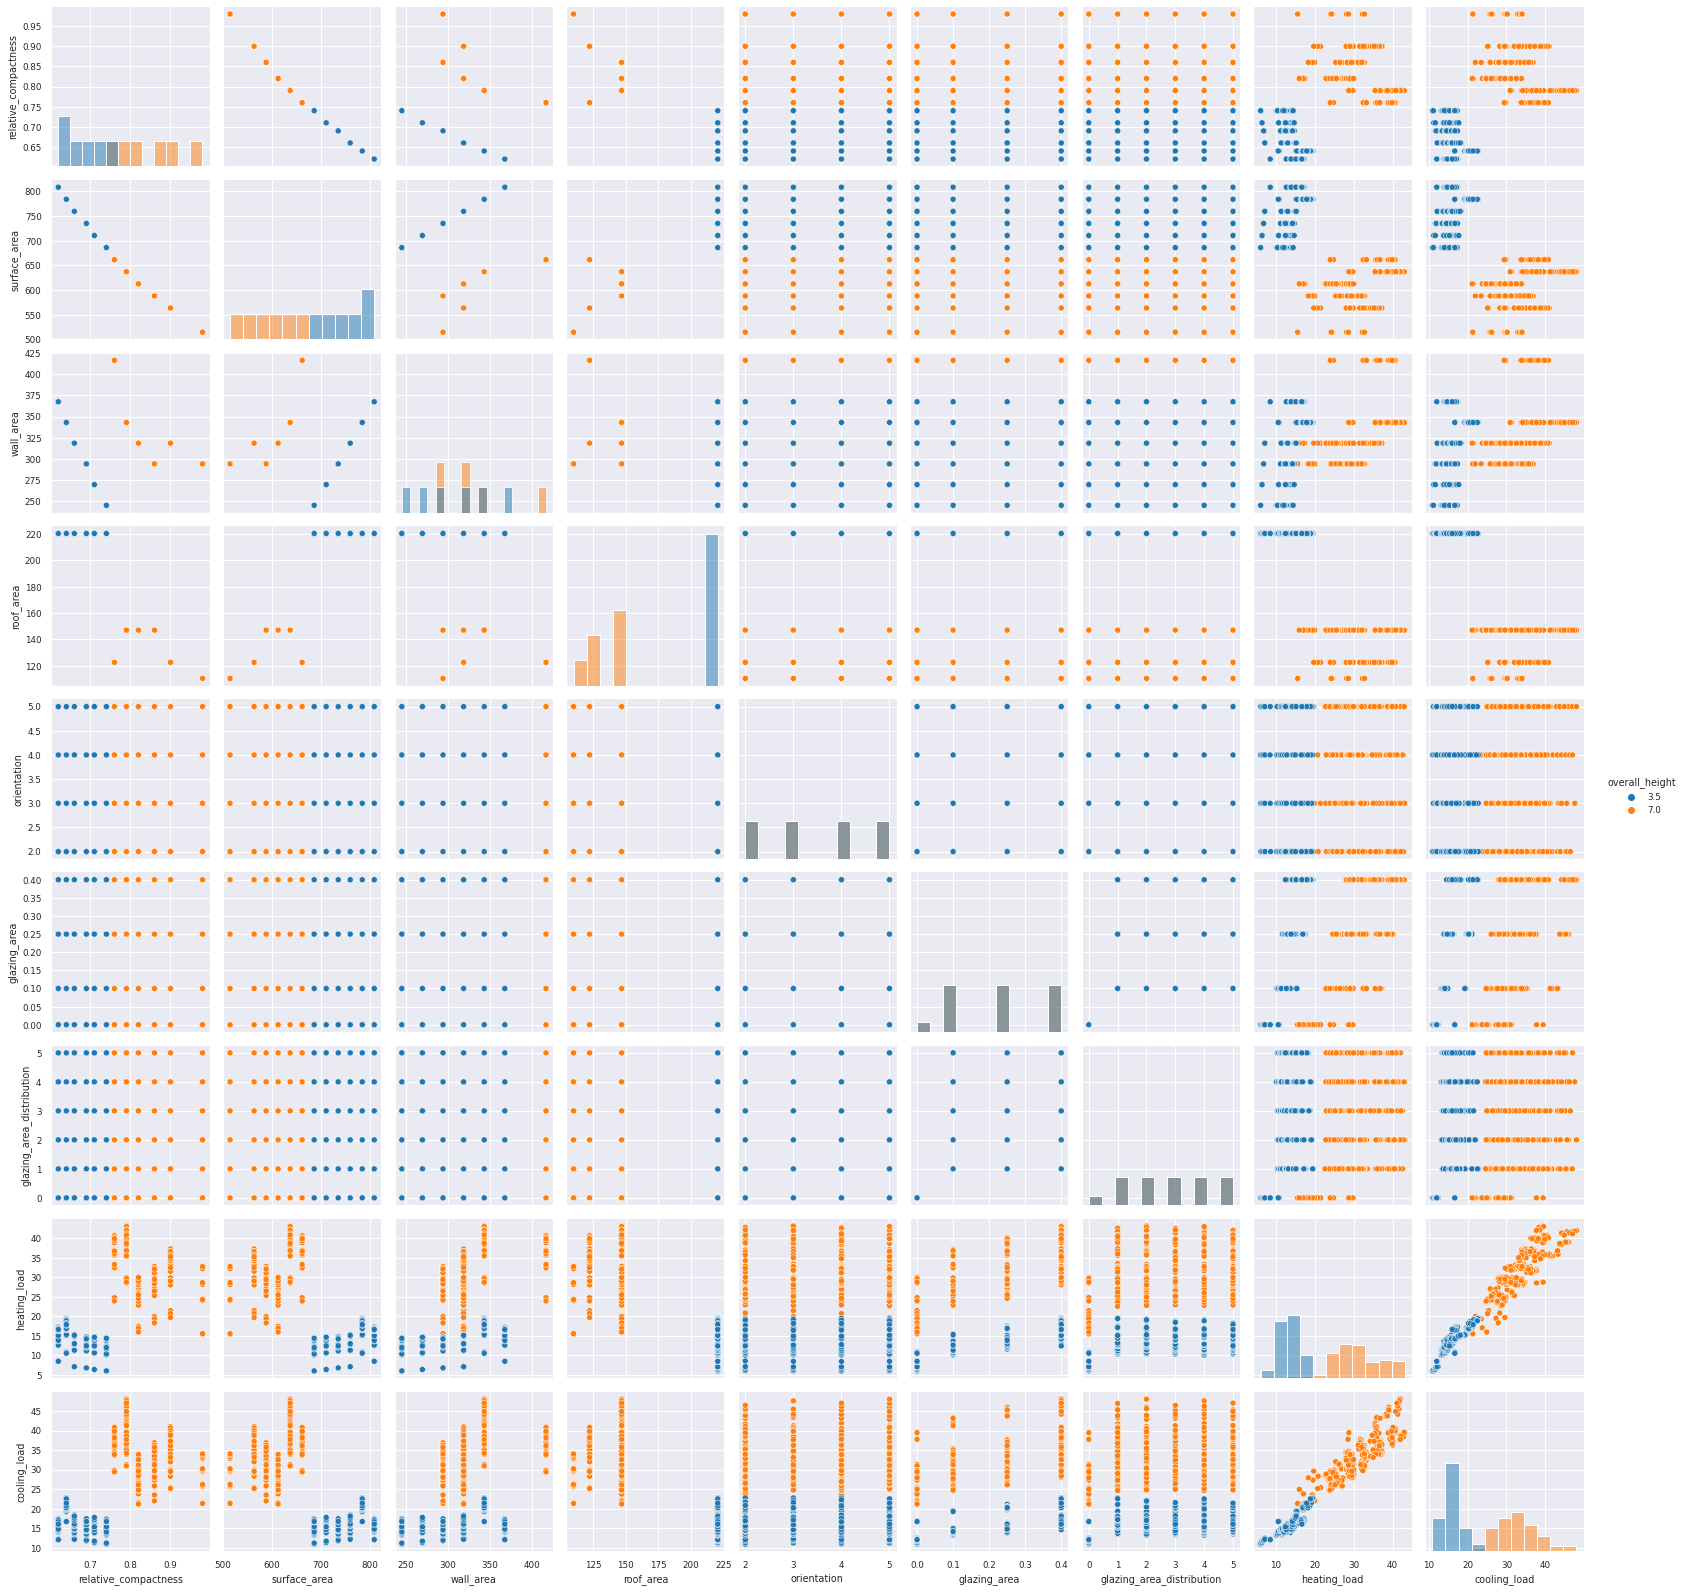

In [ ]:
# Xét mối quan hệ tuyến tính và phân bố của các biến
sns.pairplot(df,hue="overall_height", diag_kind="hist",palette = "tab10")

# images_dir = '/content/drive/MyDrive/MASTER/HK4/Advanced Statistic/finalExamination/images'
# plt.savefig(f"{images_dir}/Hinh_4_CheckRelationship.png")

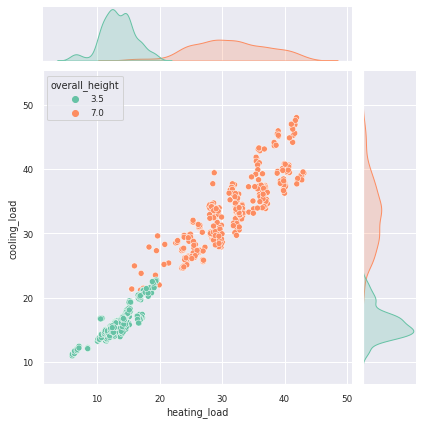

In [ ]:
sns.jointplot(data=df, x="heating_load", y="cooling_load", hue="overall_height",palette = "Set2")
# images_dir = '/content/drive/MyDrive/MASTER/HK4/Advanced Statistic/finalExamination/images'
# plt.savefig(f"{images_dir}/Hinh_5_CheckRelationshipByOverallHeight.png")

**Nhận xét:**

*   `X1-Relative Compactness` và `X2-Surface Area` có mối quan hệ tuyến tính nghịch
*   Các biến phân loại phân bố khá đồng đều
*   `X5-Overall Height` có ảnh hưởng đáng kể đến mức độ thu nhiệt và mức độ tỏa nhiệt, hơn nữa biến này cũng có liên quan đến sự phân tán của các biến  `X1-Relative Compactness`, `X2-Surface Area` và `X4-Roof Area`.
*   Mức độ thu nhiệt và tỏa nhiệt của các ngôi nhà không tuân theo phân phối chuẩn mà có phân phối bimodal, và có mối quan hệ tuyến tính khá rõ ràng




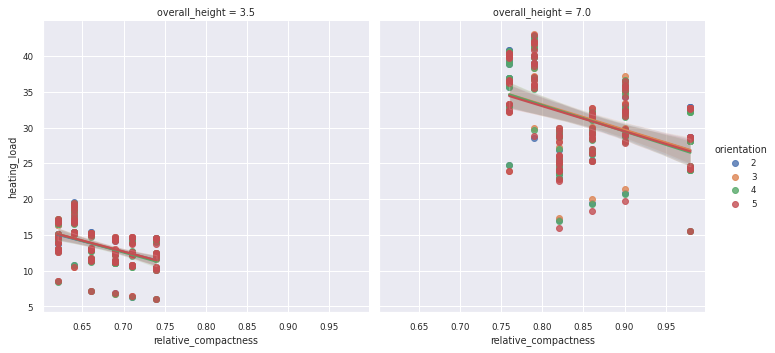

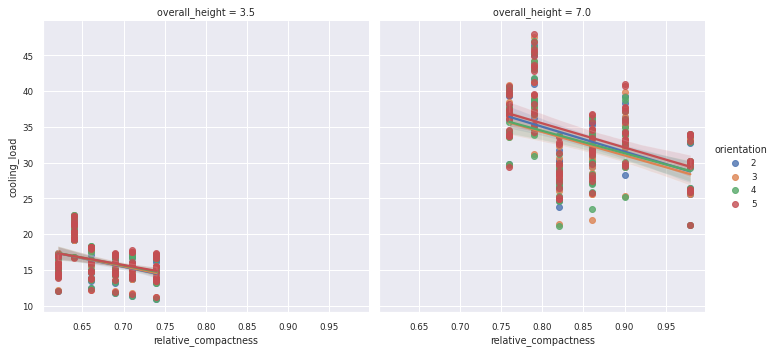

In [ ]:
sns.lmplot(data=df, x="relative_compactness", y="heating_load", col="overall_height", hue="orientation")
# images_dir = '/content/drive/MyDrive/MASTER/HK4/Advanced Statistic/finalExamination/images'
# plt.savefig(f"{images_dir}/2.7.1.png")

sns.lmplot(data=df, x="relative_compactness", y="cooling_load", col="overall_height", hue="orientation")
# images_dir = '/content/drive/MyDrive/MASTER/HK4/Advanced Statistic/finalExamination/images'
# plt.savefig(f"{images_dir}/2.7.2.png")

**Nhận xét:**

*  Biến `X1-Relative Compactness` không thể hiện rõ sự ảnh hưởng lên mức độ thu nhiệt và tỏa nhiệt.
*  Biến `X6-Orientation` không ảnh hưởng đến mức độ thu nhiệt và tỏa nhiệt.


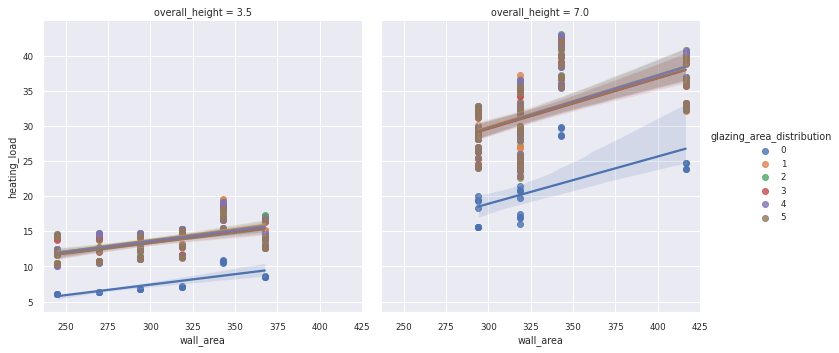

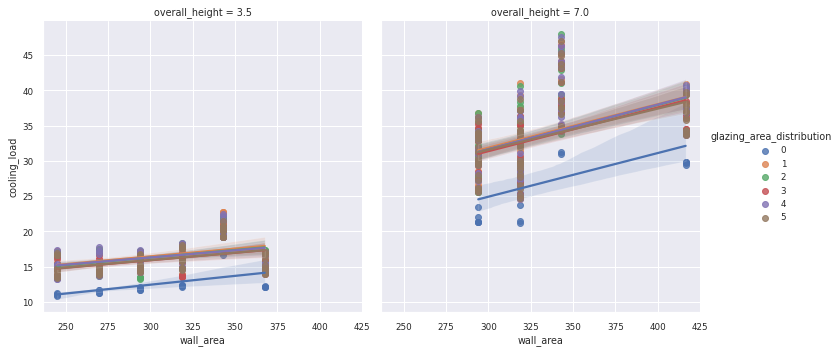

In [ ]:
sns.lmplot(data=df, x="wall_area", y="heating_load", col="overall_height", hue="glazing_area_distribution")
# images_dir = '/content/drive/MyDrive/MASTER/HK4/Advanced Statistic/finalExamination/images'
# plt.savefig(f"{images_dir}/2.8.1.png")

sns.lmplot(data=df, x="wall_area", y="cooling_load", col="overall_height", hue="glazing_area_distribution")
# images_dir = '/content/drive/MyDrive/MASTER/HK4/Advanced Statistic/finalExamination/images'
# plt.savefig(f"{images_dir}/2.8.2png")

**Nhận xét:**

*  Biến `X3- Wall Area` không thể hiện rõ sự ảnh hưởng lên mức độ thu nhiệt và tỏa nhiệt.
*  Biến `X8- Glazing Area Distribution` không ảnh hưởng rõ ràng đến mức độ thu nhiệt và tỏa nhiệt, nhưng có sự tách biệt khi `X8- Glazing Area Distribution = 0` so với các giá trị còn lại.



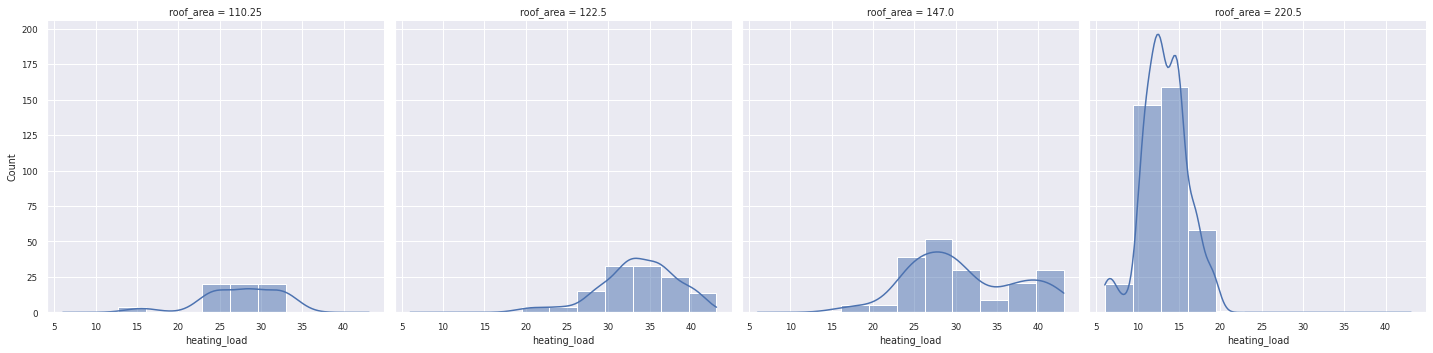

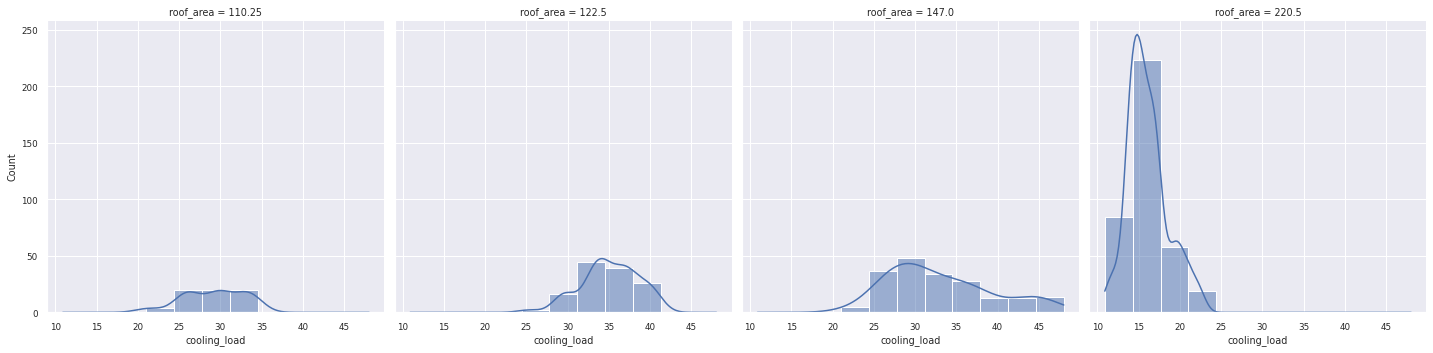

In [ ]:
sns.displot(data=df, x="heating_load", col="roof_area", kde=True)
sns.displot(data=df, x="cooling_load", col="roof_area", kde=True)

# images_dir = '/content/drive/MyDrive/MASTER/HK4/Advanced Statistic/finalExamination/images'
# plt.savefig(f"{images_dir}/Hinh_8_displot.png")

**Nhận xét:** 

`X4-Roof Area` có ảnh hưởng đến mức độ thu nhiệt và tỏa nhiệt, cụ thể: khi khu vực mái nhà lớn ($X_4=220.5$) thì mức độ thu nhiệt và tỏa nhiệt ở mức thấp (dưới 25 kWh/m²), khi khu vực mái nhà có giá trị nhỏ hơn thì mức độ thu nhiệt và tỏa nhiệt chủ yếu có giá trị trên 25 kWh/m²

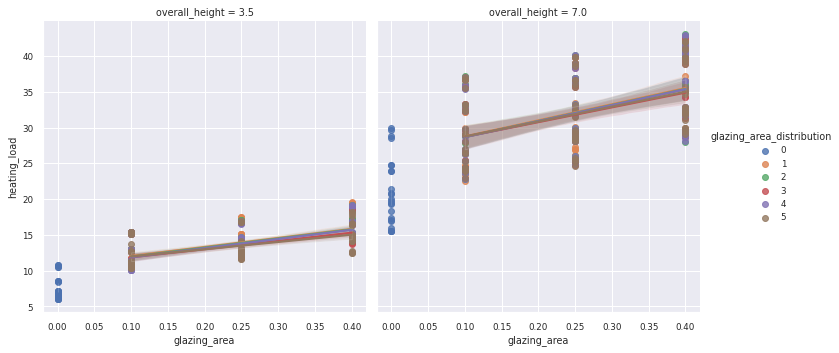

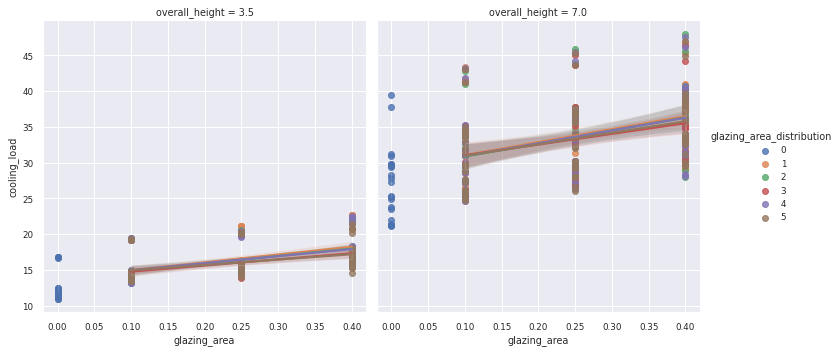

In [ ]:
sns.lmplot(data=df, x="glazing_area", y="heating_load", col="overall_height", hue="glazing_area_distribution")
# images_dir = '/content/drive/MyDrive/MASTER/HK4/Advanced Statistic/finalExamination/images'
# plt.savefig(f"{images_dir}/2.9.1.png")

sns.lmplot(data=df, x="glazing_area", y="cooling_load", col="overall_height", hue="glazing_area_distribution")
# images_dir = '/content/drive/MyDrive/MASTER/HK4/Advanced Statistic/finalExamination/images'
# plt.savefig(f"{images_dir}/2.9.2.png")

**Nhận xét:**

`X7-Glazing Area` có ảnh hưởng đến mức độ thu nhiệt và tỏa nhiệt. Khi khu vực dán kính là 0% thì mức độ thu nhiệt và tỏa nhiệt khá thấp, nhìn chung khi khu vực dán kính tăng dần thì mức độ thu nhiệt và tỏa nhiệt cũng tăng.

**KẾT LUẬN:** 

Qua các biểu đồ và nhận xét ở trên, có thể rút ra một số kết luận

* `X5-Overall Height` có vai trò quyết định đến mức độ thu nhiệt và mức độ tỏa nhiệt.
* Mức độ thu nhiệt và mức độ tỏa nhiệt bị ảnh hưởng chủ yếu bởi các biến `X3- Wall Area`, `X4-Roof Area`, `X7-Glazing Area`. Khi khu vực dán kính lớn, khu vực mái nhà lớn và diện tích tường lớn, thì mức độ thu nhiệt và tỏa nhiệt cao - và ngược lại.
* Miền giá trị (Range) của các biến `X4-Roof Area` và `X2-Surface Area` khá rộng khi chiều cao tổng thể ở mức tối thiểu `X5-Overall Height = 3.5m`. 
Ngược lại, miền giá trị của các biến `X4-Roof Area` và `X2-Surface Area` rất hẹp khi chiều cao tổng thể ở mức tối đa `X5-Overall Height = 7m`.


In [ ]:
# Thực hiện chuyển đổi categorical variables thành dummy
df_dummy = df[['wall_area', 'roof_area',
       'overall_height', 'glazing_area','heating_load' ]]

df_dummy = pd.get_dummies(data = df_dummy , columns = ['overall_height', 'glazing_area'])

In [ ]:
df_dummy.head()

,wall_area,roof_area,heating_load,overall_height_3.5,overall_height_7.0,glazing_area_0.0,glazing_area_0.1,glazing_area_0.25,glazing_area_0.4
0,294.0,110.25,15.55,0,1,1,0,0,0
1,294.0,110.25,15.55,0,1,1,0,0,0
2,294.0,110.25,15.55,0,1,1,0,0,0
3,294.0,110.25,15.55,0,1,1,0,0,0
4,318.5,122.50,20.84,0,1,1,0,0,0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


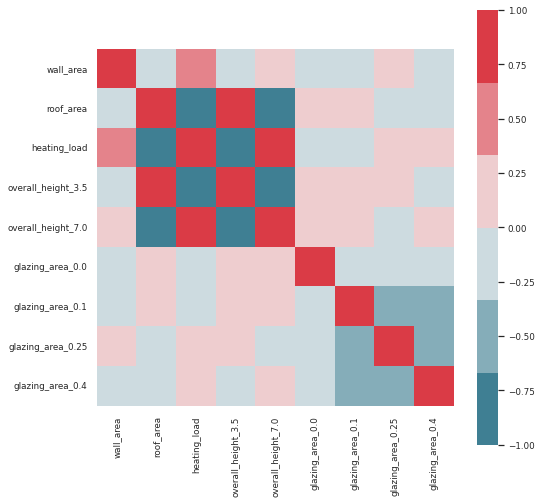

In [ ]:
# Kiểm tra tương quan giữa các biến độc lập.
f, ax = plt.subplots(figsize=(8,8))
corr = df_dummy.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10 ),
            square=True, ax=ax)

# images_dir = '/content/drive/MyDrive/MASTER/HK4/Advanced Statistic/finalExamination/images'
# plt.savefig(f"{images_dir}/2.10.png")

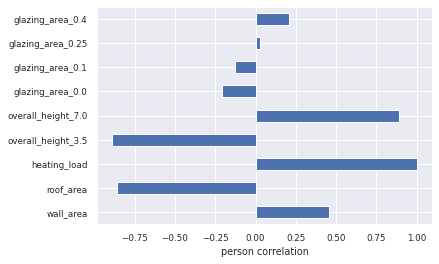

In [ ]:
#plot pearson correlation
# corr = df.iloc[:,:-1].corr().iloc[:-1,-1]
corr = df_dummy.corr()['heating_load']
fig, ax_ = plt.subplots(figsize = (6,4))
_ = corr.plot(kind = "barh", ax = ax_)
_ = ax_.set_xlabel("person correlation")

**Nhận xét:** 

* Biểu đồ heatmap cho thấy biến `Roof_area` có mối tương quan mạnh với biến `overall_height_3.5` nên thực hiện việc bỏ biến theo nguyên tắc giữ lại biến có mối tương quan mạnh hơn với biến target: Trong trường hợp này giữ lại biến `overall height_3.5`
=> Mô hình tuyến tính được xây dựng dựa trên những biến độc lập sau: `wall_area`, `overall_height_7.0`, `glazing_area_0.0`, `glazing_area_0.1`, `glazing_area_0.25`, `glazing_area_0.4`


## Regression Models



In [ ]:
import sklearn
import statsmodels.api as sm
import os
from sklearn import linear_model
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Simple Linear Regression

In [ ]:
df_1 = df_dummy[['wall_area', 
                 'overall_height_3.5',
                 'overall_height_7.0', 
                 'glazing_area_0.0', 
                 'glazing_area_0.1' ,
                 'glazing_area_0.25',
                 'glazing_area_0.4']]
#split data into train, test
from sklearn.model_selection import train_test_split
X =  df_1
y = df_dummy['heating_load']
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model = model.fit(X_train, y_train)
r_sq = model.score(X_train, y_train)
print('coefficient of determination:', r_sq)
# intercept_ holds the bias 𝑏₀, while now .coef_ is an array containing 𝑏₁ and 𝑏₂... respectively.
print('slope:', model.coef_)

coefficient of determination: 0.9195942574636295
slope: [ 0.05216573 -8.32309615  8.32309615 -6.64356839 -0.2721572   2.18432086
  4.73140472]


In [ ]:
y_pred = model.predict(X_test)
print("rmse", sklearn.metrics.mean_squared_error(y_test, y_pred))

rmse 8.813339013547402


In [ ]:
#Kiểm tra ý nghĩa thống kê của các biến độc lập bằng p_value. Nếu biến độc lập có p_value > alpha => không có ý nghĩa thống kê.
# x = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           heating_load   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     1162.
Date:                Thu, 05 May 2022   Prob (F-statistic):          2.37e-275
Time:                        13:52:13   Log-Likelihood:                -1265.1
No. Observations:                 514   AIC:                             2542.
Df Residuals:                     508   BIC:                             2568.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
wall_area              0.0522      0

Text(0, 0.5, 'Predicted Values')

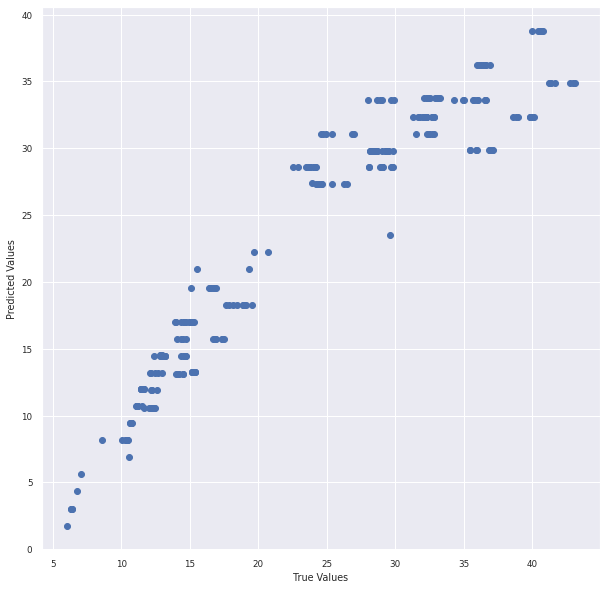

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')

(1.0, 50.0)

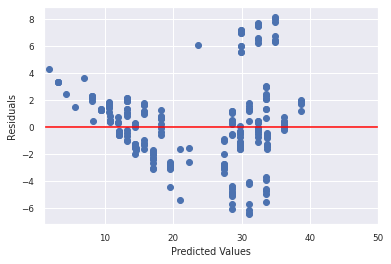

In [ ]:
# Thực hiện kiểm định phần dư cho mô hình trên
res = y_test - y_pred
plt.scatter( y_pred, res)
plt.axhline(0, color='red')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.xlim([1,50])

# images_dir = '/content/drive/MyDrive/MASTER/HK4/Advanced Statistic/finalExamination/images'
# plt.savefig(f"{images_dir}/2.13.png")

**Nhận xét**: 
Bằng việc quan sát các điểm dữ liệu phần dư trên cho chúng ta thấy phần dư phân bố tương đối ngẫu nhiên, không theo một distinct pattern đó là dấu hiệu của một mô hình tuyến tính khá tốt. Vì là mô hình `Polynomial Regression` nên phần dư sẽ không đối xứng qua đường màu đỏ nằm ngang resudual = 0. ( Nếu là mô hình linear regression thì sẽ đối xứng qua residual = 0)


### Decision Tree Regressor

In [ ]:
#Normalize the inputs and set the output
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split
nr = Normalizer(copy=False)

X = df.drop(['heating_load','cooling_load'], axis=1)
X = nr.fit_transform(X)
y = df[['heating_load']]

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 123)

#Create model evaluation function
def evaluate(model, test_features, test_labels):
    from sklearn.metrics import r2_score
    predictions = model.predict(test_features)
    R2 = np.mean(r2_score(test_labels, predictions))
    print('R2 score = %.3f' % R2)
    return r2_score

#Import decision tree regressor
from sklearn.tree import DecisionTreeRegressor
# Create decision tree model 

dt_model = DecisionTreeRegressor(random_state=123)
# Apply the model
dt_model.fit(X_train, y_train)
# Predicted value
y_pred1 = dt_model.predict(X_test)

#R2 score before optimization
R2_before_dt= evaluate(dt_model, X_test, y_test)

R2 score = 0.997


In [ ]:
# Decision tree optimization parameters
from sklearn.model_selection import GridSearchCV
parameters = {'max_depth' : [7,8,9],
              'min_samples_split': [16,17,18],
              'min_samples_leaf' : [6,7,8]}

#Create new model using the GridSearch
dt_random = GridSearchCV(dt_model, parameters, cv=10)

#Apply the model
dt_random.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(random_state=123),
             param_grid={'max_depth': [7, 8, 9], 'min_samples_leaf': [6, 7, 8],
                         'min_samples_split': [16, 17, 18]})

In [ ]:
#View the best parameters
dt_random.best_params_

{'max_depth': 9, 'min_samples_leaf': 6, 'min_samples_split': 16}

In [ ]:

dt_model = DecisionTreeRegressor(random_state=123, max_depth =9 ,  min_samples_leaf = 6, min_samples_split = 16)
# Apply the model
dt_model.fit(X_train, y_train)
# Predicted value
y_pred1 = dt_model.predict(X_test)

#R2 score before optimization
R2_before_dt= evaluate(dt_model, X_test, y_test)

R2 score = 0.996


In [ ]:
# y_pred_poly = poly_model.predict(X_test)
print("rmse", sklearn.metrics.mean_squared_error(y_test, y_pred1))

rmse 0.40805044453718115


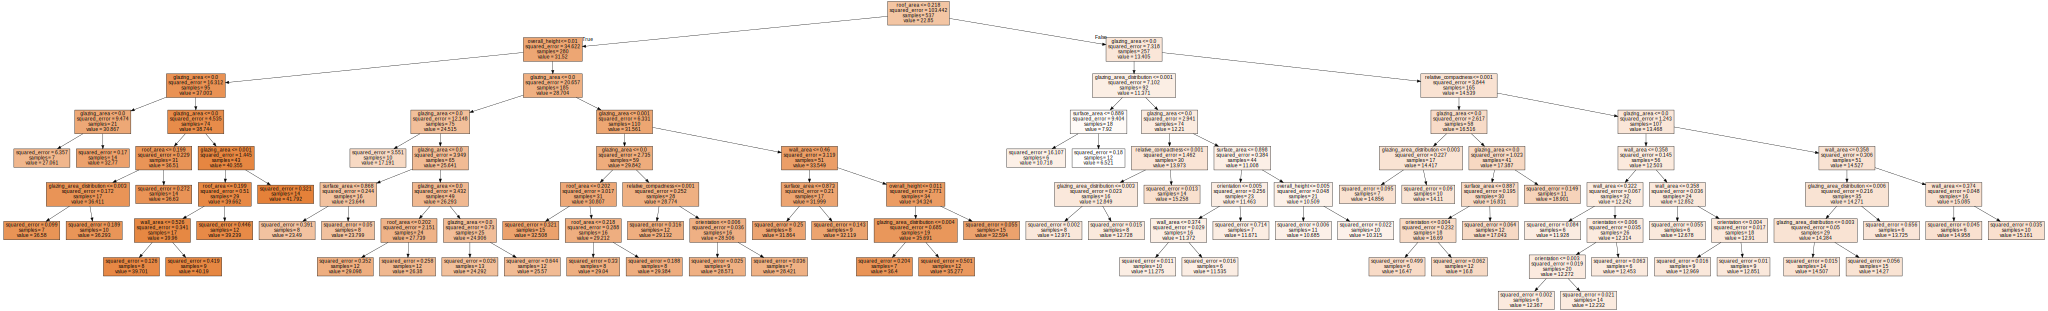

In [ ]:
import graphviz
# DOT data
dot_data = tree.export_graphviz(dt_model, out_file=None, 
                   feature_names=df.drop(['heating_load','cooling_load'], axis=1).columns,  
                   class_names=y.columns,
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph
# graph.render(filename='g1.dot')

## Đề xuất kiểm định phù hợp 
So sánh trung bình mức thu nhiệt và tỏa nhiệt của các ngôi nhà. t-test <br>
Phát biểu giải thuyết $H_0$ và $H_1$ với mức ý nghĩa $\alpha = 0.05$ <br>
$H_0$: $U_1 = U_2$ hay trung bình mức thu nhiệt và mức tỏa nhiệt của các ngôi nhà là bằng nhau <br>
$H_1$: $U_1 \ne U_2$ hay trung bình mức thu nhiệt và mức tỏa nhiệt của các ngôi nhà là khác nhau

In [ ]:
df.shape

(768, 10)

In [ ]:
data_group1 = df['heating_load']
data_group2 = df['cooling_load']
import scipy.stats as stats
stats.ttest_ind(a=data_group1, b=data_group2, equal_var= False) 

Ttest_indResult(statistic=-4.557382459001992, pvalue=5.591534707306529e-06)

Từ kết quả trên chúng ta thấy: $p-value = 5.5e-06 < \alpha$ $(0.05)$ chúng ta bác bỏ giả thuyết $H_0$ với mức ý nghĩa α = 0.05. Hay giá trị trung bình thu nhiệt khác giá trị trung bình tỏa nhiệt của các ngôi nhà.



## Các phân tích khác nếu cần 
Dùng kiểm định one-way ANOVA để kiểm tra giá trị trung bình thu nhiệt và toả nhiệt của những ngôi nhà là giống hay khác nhau.
Phát biểu giải thuyết $H_0$ và $H_1$ với mức ý nghĩa $\alpha = 0.05$ <br>
$H_0$: $U_1 = U_2$ hay trung bình mức thu nhiệt và mức tỏa nhiệt của các ngôi nhà là bằng nhau <br>
$H_1$: $U_1 \ne U_2$ hay trung bình mức thu nhiệt và mức tỏa nhiệt của các ngôi nhà là khác nhau


In [ ]:
from scipy.stats import f_oneway
#perform one-way ANOVA
f_oneway(data_group1, data_group2)

F_onewayResult(statistic=20.769734877619012, pvalue=5.5900728660146584e-06)

Từ kết quả trên chúng ta thấy: $p-value = 5.59e-06 < \alpha$ $(0.05)$ chúng ta bác bỏ giả thuyết $H_0$ với mức ý nghĩa α = 0.05. Hay giá trị trung bình thu nhiệt khác giá trị trung bình tỏa nhiệt của các ngôi nhà.

